In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (10.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122518 files and dir

# 1.라이브러리 및 데이터 로드

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:80% !important;}</style>"))
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (12,8)  #시각화 figure default 설정
mpl.rcParams['font.family'] = 'NanumGothic' #폰트 디폴트 설정
mpl.rcParams['font.size'] = 10    #폰트 사이즈 디폴트 설정
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

In [2]:
import os
os.listdir()

['.config', 'sample_data']

In [ ]:
# df = pd.read_csv('최종_광진구_데이터셋.csv')

In [ ]:
print(list(df.columns))

['fid', 'id', 'left', 'top', 'right', 'bottom', '관광여가오락수', '교육수', '부동산수', '생활서비스수', '소매수', '숙박수', '스포츠수', '음식수', '총건물수', '승차총승객수', '하차총승객수', '대지면적', '단독건물수', '건물면적', '공동건축물수', '60대총인구수', '50대총인구수', '40대총인구수', '30대총인구수', '20대총인구수', '총인구대비남성비율', '총인구대비여성비율', '생산가능인구남성비율', '생산가능인구여성비율', '인구당전기차수', '병원수', '어린이집수', '학교수_y', '공영주차장수', '전기차충전기수', '급속충전기수', '완속충전기수', '전기차충전기유무', '급속충전기유무', '완속충전기유무']


In [ ]:
round(df["전기차충전기유무"].value_counts() / df.shape[0] * 100, 2)

0    87.95
1    12.05
Name: 전기차충전기유무, dtype: float64

# 2.K-means 클러스터링

In [ ]:
df_km = df.loc[:,"관광여가오락수":"전기차충전기수"]
df_km.head(3)

,관광여가오락수,교육수,부동산수,생활서비스수,소매수,숙박수,스포츠수,음식수,총건물수,승차총승객수,...,총인구대비남성비율,총인구대비여성비율,생산가능인구남성비율,생산가능인구여성비율,인구당전기차수,병원수,어린이집수,학교수_y,공영주차장수,전기차충전기수
0,0,0,0,3,3,0,0,45,61,0.0,...,0.509728,0.490272,0.525114,0.474886,4.483957,0,0,0,0,0
1,7,0,0,3,4,0,0,38,32,0.0,...,0.622222,0.377778,0.766667,0.233333,0.785129,0,0,0,0,0
2,4,3,1,5,5,0,2,21,28,0.0,...,0.484375,0.515625,0.486607,0.513393,4.466510,4,1,0,0,0


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, 
                init = 'random', 
                n_init = 10,
                max_iter = 1000,
                tol = 0.0001,
                random_state = 100)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc_scaler = StandardScaler()
# gwangjin_sc = sc_scaler.fit_transform(gwangjin)

In [ ]:
# import sklearn
# print(sklearn.show_versions())
# !conda uninstall sklearn
# !conda install -c conda-forge scikit-learn

In [ ]:
df_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   관광여가오락수     1095 non-null   int64  
 1   교육수         1095 non-null   int64  
 2   부동산수        1095 non-null   int64  
 3   생활서비스수      1095 non-null   int64  
 4   소매수         1095 non-null   int64  
 5   숙박수         1095 non-null   int64  
 6   스포츠수        1095 non-null   int64  
 7   음식수         1095 non-null   int64  
 8   총건물수        1095 non-null   int64  
 9   승차총승객수      1095 non-null   float64
 10  하차총승객수      1095 non-null   float64
 11  대지면적        1095 non-null   float64
 12  단독건물수       1095 non-null   int64  
 13  건물면적        1095 non-null   float64
 14  공동건축물수      1095 non-null   int64  
 15  60대총인구수     1095 non-null   int64  
 16  50대총인구수     1095 non-null   int64  
 17  40대총인구수     1095 non-null   int64  
 18  30대총인구수     1095 non-null   int64  
 19  20대총인구수     1095 non-null  

In [ ]:
kmeans.fit(df_km)

KMeans(init='random', max_iter=1000, n_clusters=3, n_init=10, random_state=100)

In [ ]:
preds = kmeans.predict(df_km)

In [ ]:
preds

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state = 100)

In [ ]:
cluster_results = pd.DataFrame(pca.fit_transform(df_km), columns = ["pca_1", "pca_2"])

In [ ]:
cluster_results["label"] = preds
cluster_results

,pca_1,pca_2,label
0,-2332.459498,-245.872529,2
1,-2244.606596,-209.527524,2
2,-2294.731847,-224.689291,2
3,-2296.211090,-229.417956,2
4,-2280.135459,-222.217912,2
...,...,...,...
1090,-2319.922417,-248.780085,2
1091,-2084.404730,-183.744487,2
1092,-2335.891666,-246.010313,2
1093,-2269.641321,-239.486094,2


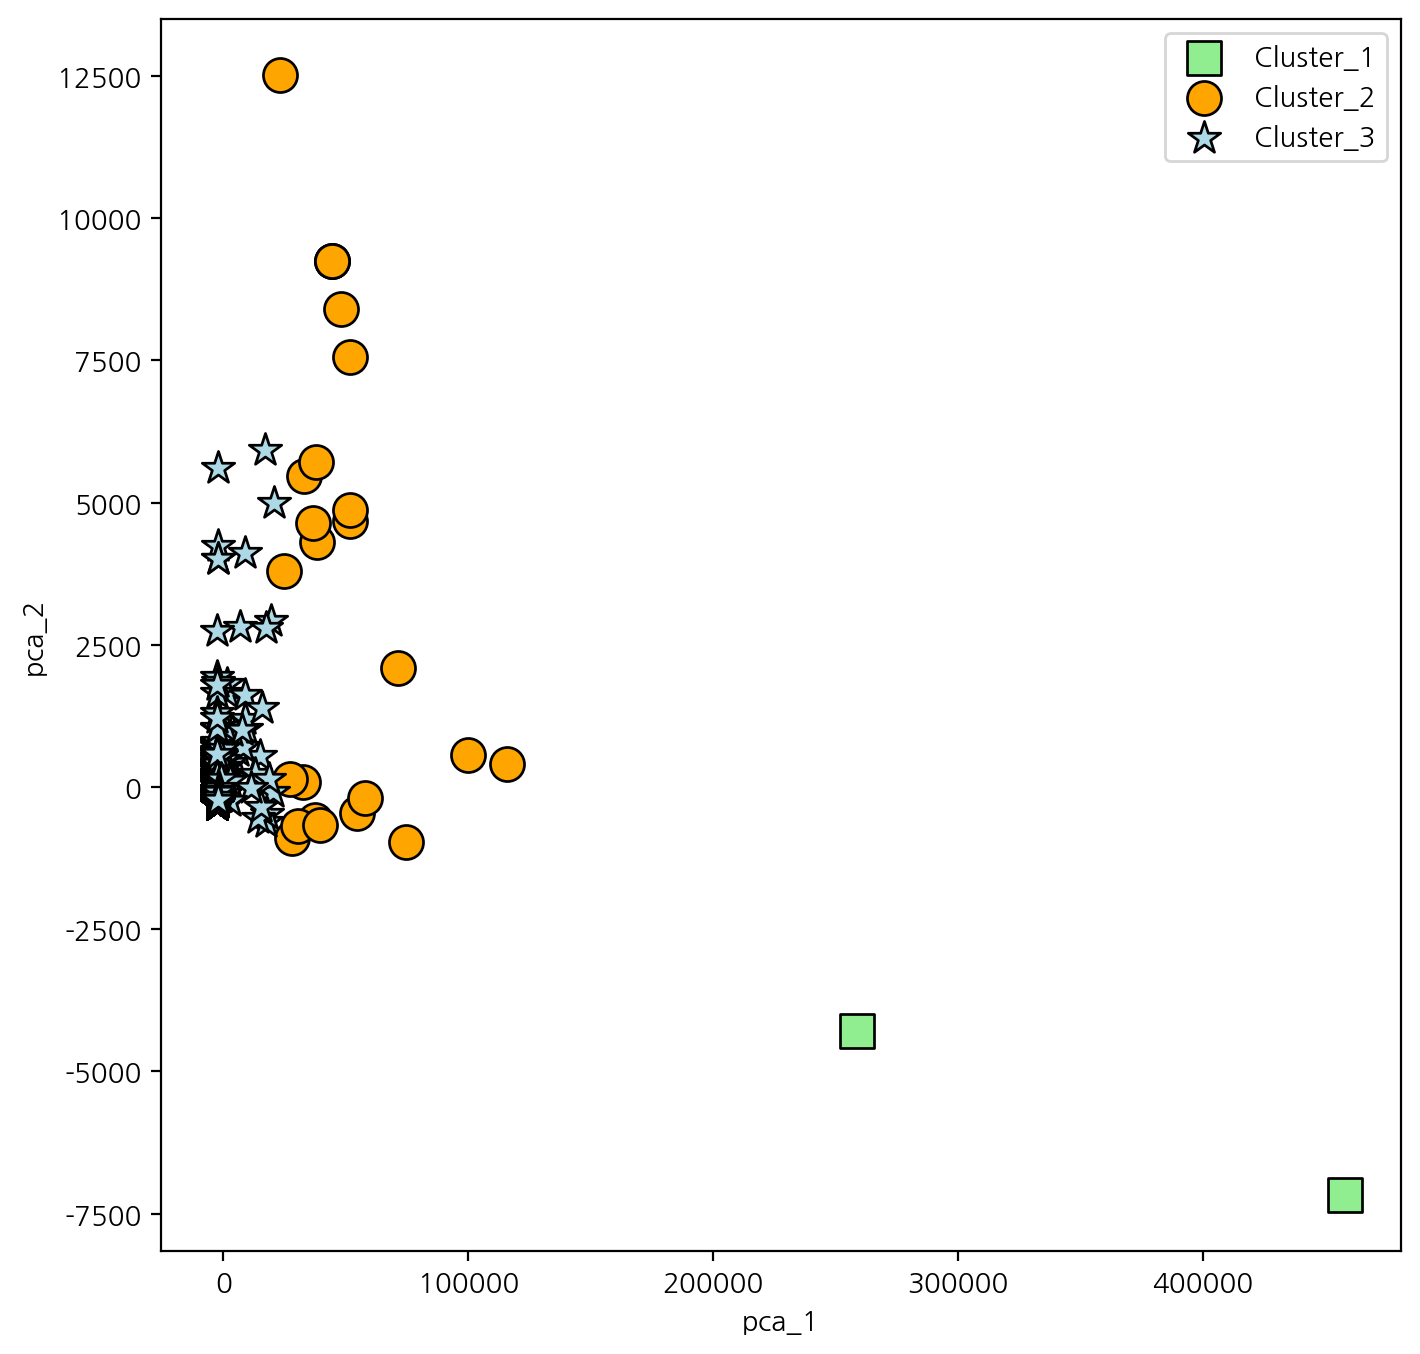

In [ ]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = cluster_results[preds == 0]["pca_1"],
                y = cluster_results[preds == 0]["pca_2"],
                s = 150,
                color = 'lightgreen',
                marker = 's', 
                edgecolor = 'black',
                label = "Cluster_1")

sns.scatterplot(x = cluster_results[preds == 1]["pca_1"],
                y = cluster_results[preds == 1]["pca_2"],
                s = 150,
                color = 'orange',
                marker = 'o', 
                edgecolor = 'black',
                label = "Cluster_2")

sns.scatterplot(x = cluster_results[preds == 2]["pca_1"],
                y = cluster_results[preds == 2]["pca_2"],
                s = 150,
                color = 'lightblue',
                marker = '*', 
                edgecolor = 'black',
                label = "Cluster_3")

# sns.scatterplot(x = kmeans.cluster_centers_[:,0],
#                 y = kmeans.cluster_centers_[:,1],
#                 s = 250,
#                 color = 'red',
#                 marker = '*', 
#                 edgecolor = 'black',
#                 label = "Centeroids")
plt.show()

In [ ]:
print("intertia : % .2f" % kmeans.inertia_)

intertia :  38742588026.42


In [ ]:
inertia_list =[]
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i,
                   init="k-means++",
                   n_init = 10,
                   max_iter = 1000,
                   random_state = 100)
    kmeans.fit(df_km)
    inertia_list.append(kmeans.inertia_)

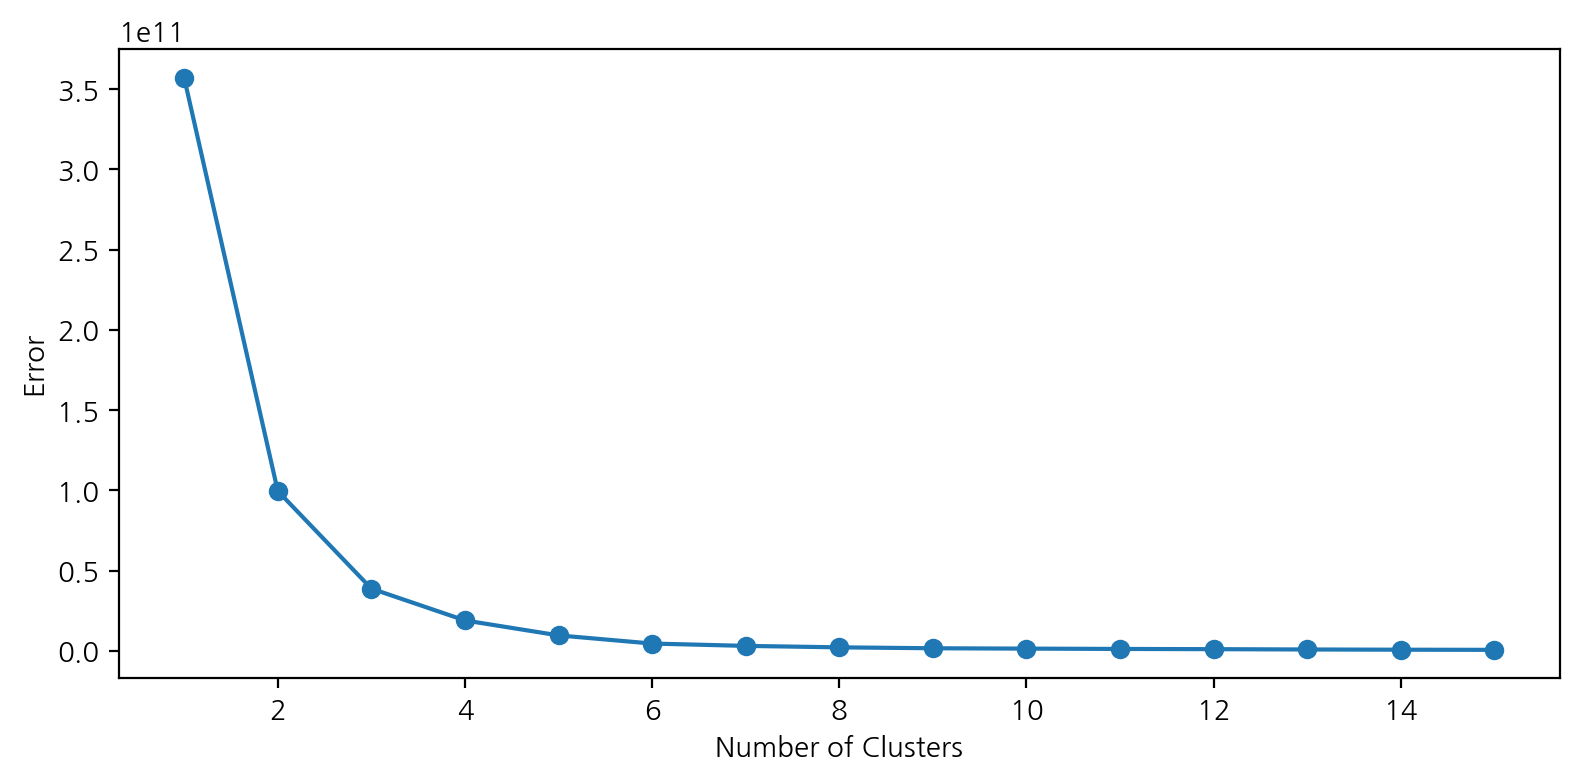

In [ ]:
plt.figure(figsize = (8,4))
plt.plot(range(1, 16), inertia_list, marker = 'o')
plt.xlabel("Number of Clusters")
plt.ylabel("Error")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_list = []
for i in range(2, 15):   
    kmeans = KMeans(n_clusters = i,
                    init="k-means++",
                    n_init = 10,
                    max_iter = 1000,
                    random_state = 100)
    kmeans.fit(df_km)
    preds = kmeans.predict(df_km)
    silhouette_list.append(silhouette_score(df_km, preds))

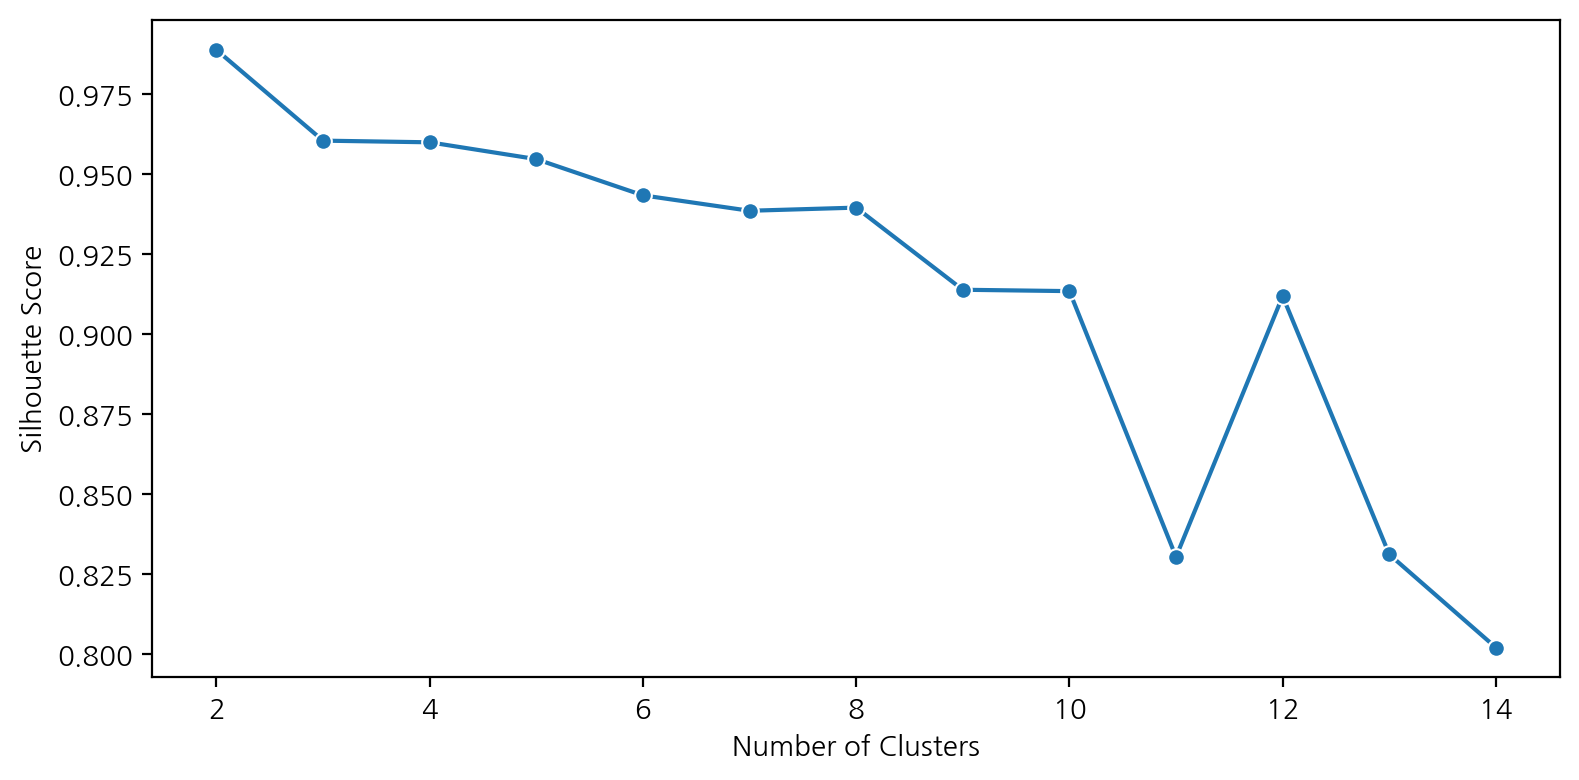

In [ ]:
plt.figure(figsize = (8,4))
sns.lineplot(x = range(2, 15), y = silhouette_list, marker = 'o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_km_sc = sc.fit_transform(df_km)

kmeans_8 = KMeans(n_clusters = 8, 
                init = 'random', 
                n_init = 10,
                max_iter = 1000,
                tol = 0.0001,
                random_state = 100)

kmeans_8.fit(df_km_sc)
preds = kmeans_8.predict(df_km_sc)

pca = PCA(n_components=2, random_state = 100)

cluster_results = pd.DataFrame(pca.fit_transform(df_km), columns = ["pca_1", "pca_2"])

cluster_results["label"] = preds
cluster_results

,pca_1,pca_2,label
0,-2332.459498,-245.872529,7
1,-2244.606596,-209.527524,7
2,-2294.731847,-224.689291,7
3,-2296.211090,-229.417956,5
4,-2280.135459,-222.217912,5
...,...,...,...
1090,-2319.922417,-248.780085,5
1091,-2084.404730,-183.744487,7
1092,-2335.891666,-246.010313,5
1093,-2269.641321,-239.486094,5


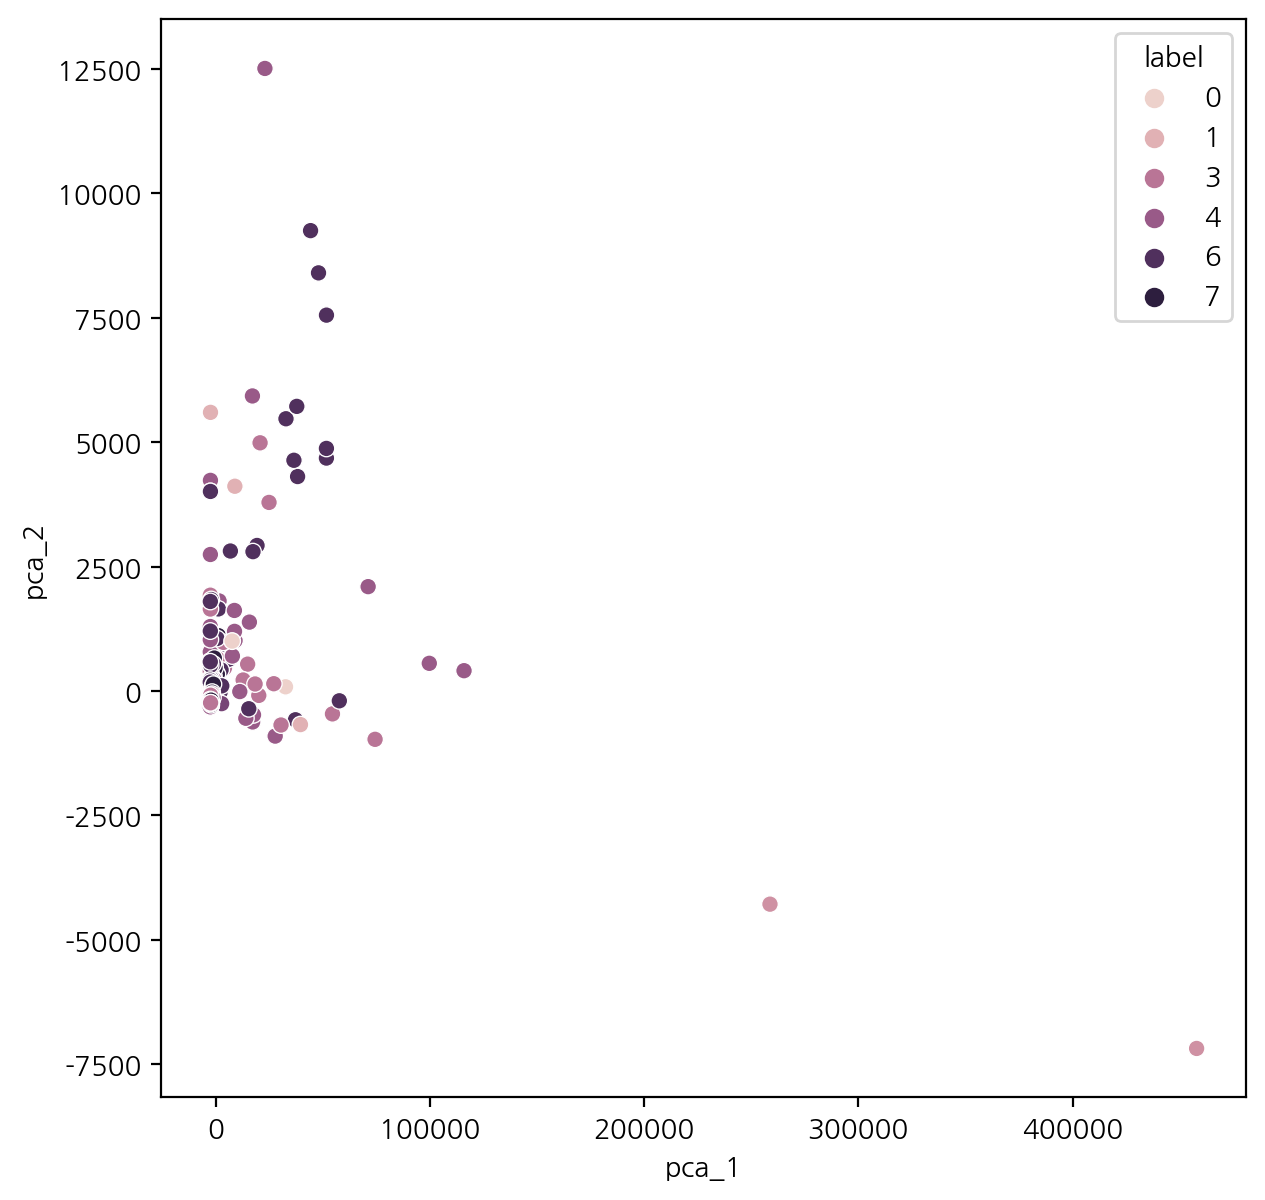

In [ ]:
plt.figure(figsize = (7,7))
sns.scatterplot(data = cluster_results, x = "pca_1",
                y = "pca_2",
                hue = "label",
                color = "Set3")
plt.show()

# 3.Stratified K-fold + 3 Boosting Model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier

import os
import random

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(100) # Seed 고정

In [ ]:
# df.head(3)

In [ ]:
X = df.loc[:,'관광여가오락수':'공영주차장수']
y = df['전기차충전기유무']

In [ ]:
y.value_counts()

0    963
1    132
Name: 전기차충전기유무, dtype: int64

In [ ]:
#  predictions = clf.predict(X_test)
# >>> cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
# >>> disp = ConfusionMatrixDisplay(confusion_matrix=cm,
# ...                               display_labels=clf.classes_)

## 3.1XGBClassifier

In [ ]:
# 분류 모델 객체 
xgc = XGBClassifier(random_state = 100)
lgc = LGBMClassifier(random_state = 100)
cbc = CatBoostClassifier(random_state = 100)

# StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 100)
idx_list = []
proba_list = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    
    #XGBClassifier 학습 및 예측
    xgc.fit(X_train, y_train)
    proba = xgc.predict_proba(X_test)[:,1]

    #test_index, proba 리스트에 결합
    idx_list.extend(test_index)
    proba_list.extend(proba)
    
    print(f"{i+1}번째 fold 예측 완료")
    print("인덱스 개수", len(idx_list), "예측값 수", len(proba_list))

    df_xgc = pd.DataFrame({"인덱스": idx_list,
                           "P(y=1)":proba_list})
    print("df생성 완료")

1번째 fold 예측 완료
인덱스 개수 365 예측값 수 365
df생성 완료
2번째 fold 예측 완료
인덱스 개수 730 예측값 수 730
df생성 완료
3번째 fold 예측 완료
인덱스 개수 1095 예측값 수 1095
df생성 완료


In [ ]:
df_xgc

,인덱스,P(y=1)
0,2,0.003652
1,5,0.025899
2,7,0.000291
3,8,0.958391
4,9,0.046683
...,...,...
1090,1089,0.237867
1091,1090,0.085860
1092,1091,0.073519
1093,1092,0.019240


## 3.2LGBMClassifier

In [ ]:
# 분류 모델 객체 
xgc = XGBClassifier(random_state = 100)
lgc = LGBMClassifier(random_state = 100)
cbc = CatBoostClassifier(random_state = 100)

# StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 100)
idx_list = []
proba_list = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    
    #XGBClassifier 학습 및 예측
    lgc.fit(X_train, y_train)
    proba = lgc.predict_proba(X_test)[:,1]

    #test_index, proba 리스트에 결합
    idx_list.extend(test_index)
    proba_list.extend(proba)
    
    print(f"{i+1}번째 fold 예측 완료")
    # print("인덱스 개수", len(idx_list), "예측값 수", len(proba_list))

    df_lgc = pd.DataFrame({"인덱스": idx_list,
                           "P(y=1)":proba_list})
    print("df생성 완료")

1번째 fold 예측 완료
df생성 완료
2번째 fold 예측 완료
df생성 완료
3번째 fold 예측 완료
df생성 완료


## 3.3CatBoostClassifier

In [ ]:
# 분류 모델 객체 
xgc = XGBClassifier(random_state = 100)
lgc = LGBMClassifier(random_state = 100)
cbc = CatBoostClassifier(random_state = 100)

# StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 100)
idx_list = []
proba_list = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    
    #XGBClassifier 학습 및 예측
    cbc.fit(X_train, y_train)
    proba = cbc.predict_proba(X_test)[:,1]

    #test_index, proba 리스트에 결합
    idx_list.extend(test_index)
    proba_list.extend(proba)
    
    print(f"{i+1}번째 fold 예측 완료")
    # print("인덱스 개수", len(idx_list), "예측값 수", len(proba_list))

    df_cbc = pd.DataFrame({"인덱스": idx_list,
                           "P(y=1)":proba_list})
    print("df생성 완료")

Learning rate set to 0.009007
0:	learn: 0.6858338	total: 8.8ms	remaining: 8.8s
1:	learn: 0.6787854	total: 12.1ms	remaining: 6.04s
2:	learn: 0.6712007	total: 15.3ms	remaining: 5.08s
3:	learn: 0.6644543	total: 18.5ms	remaining: 4.61s
4:	learn: 0.6578410	total: 22.1ms	remaining: 4.39s
5:	learn: 0.6514697	total: 25.5ms	remaining: 4.23s
6:	learn: 0.6449245	total: 29.1ms	remaining: 4.12s
7:	learn: 0.6383508	total: 32.6ms	remaining: 4.04s
8:	learn: 0.6323019	total: 36.4ms	remaining: 4.01s
9:	learn: 0.6261480	total: 40.1ms	remaining: 3.97s
10:	learn: 0.6197770	total: 43.6ms	remaining: 3.92s
11:	learn: 0.6144114	total: 47.3ms	remaining: 3.9s
12:	learn: 0.6082015	total: 50.9ms	remaining: 3.86s
13:	learn: 0.6025672	total: 54.5ms	remaining: 3.83s
14:	learn: 0.5967133	total: 58ms	remaining: 3.81s
15:	learn: 0.5915054	total: 61.5ms	remaining: 3.78s
16:	learn: 0.5865700	total: 64.9ms	remaining: 3.75s
17:	learn: 0.5813900	total: 68.6ms	remaining: 3.74s
18:	learn: 0.5761582	total: 72.1ms	remaining: 3.7

In [ ]:
df_1 = df_xgc.merge(df_lgc, how='left', on='인덱스')
df_total = df_1.merge(df_cbc, how='left', on='인덱스')

In [ ]:
df_total = df_total.sort_values("인덱스").set_index("인덱스")

In [ ]:
df_total["avg_p"] = df_total.mean(axis = 1)

In [ ]:
top20_idx = df_total[df_total.sort_values("avg_p", ascending=False)["avg_p"] > 0.5].index
df.iloc[top20_idx,:]["전기차충전기유무"]

8       0
16      1
29      1
43      0
52      1
83      0
86      1
123     0
234     0
270     0
287     0
397     0
466     0
471     0
651     0
856     0
1020    1
1065    0
1076    0
Name: 전기차충전기유무, dtype: int64

# 4.최종예측결과

In [ ]:
df_total["avg_p"].describe()

count    1095.000000
mean        0.078326
std         0.115330
min         0.003200
25%         0.017439
50%         0.032190
75%         0.083758
max         0.794093
Name: avg_p, dtype: float64

f1값: 0.27442827442827444


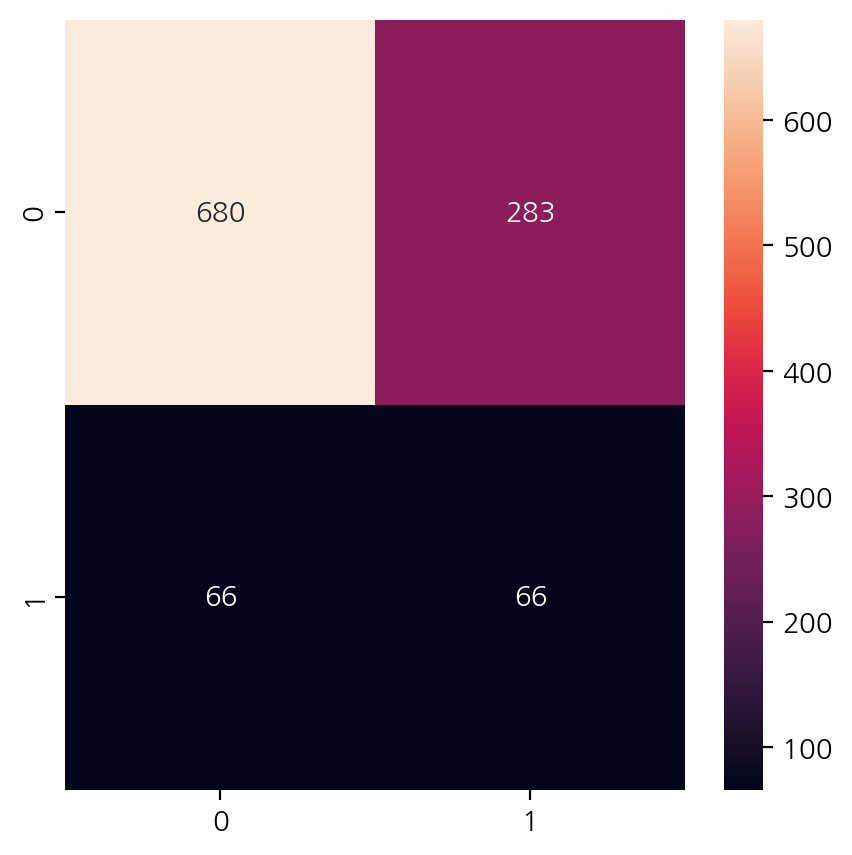

In [ ]:
threshold = 0.06
prediction = np.where(df_total["avg_p"] > threshold, 1, 0)
print("f1값:", f1_score(y, prediction))
plt.figure(figsize = (5,5))
cm_matrix = confusion_matrix(y, prediction, labels= [0,1])
sns.heatmap(cm_matrix, annot=True, fmt = 'd')
plt.show()